# **Train YOLO11 Object Detection on a Custom Dataset**

# **Install Ultralytics**

In [1]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.2 MB/s eta 0:00:00


# **Import all necessary Libraries**

In [2]:
from ultralytics import YOLO
from IPython.display import Image,display

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Download Dataset From Roboflow**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NdtJjcJiaqyh6kXqq34s")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


# **Custom Training**

In [2]:
!yolo task=detect mode=train model=yolo11n.pt data=/content/road-signs-2/data.yaml epochs=200 imgsz=640 plots=True

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/road-signs-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspectiv

# **View Training Results**

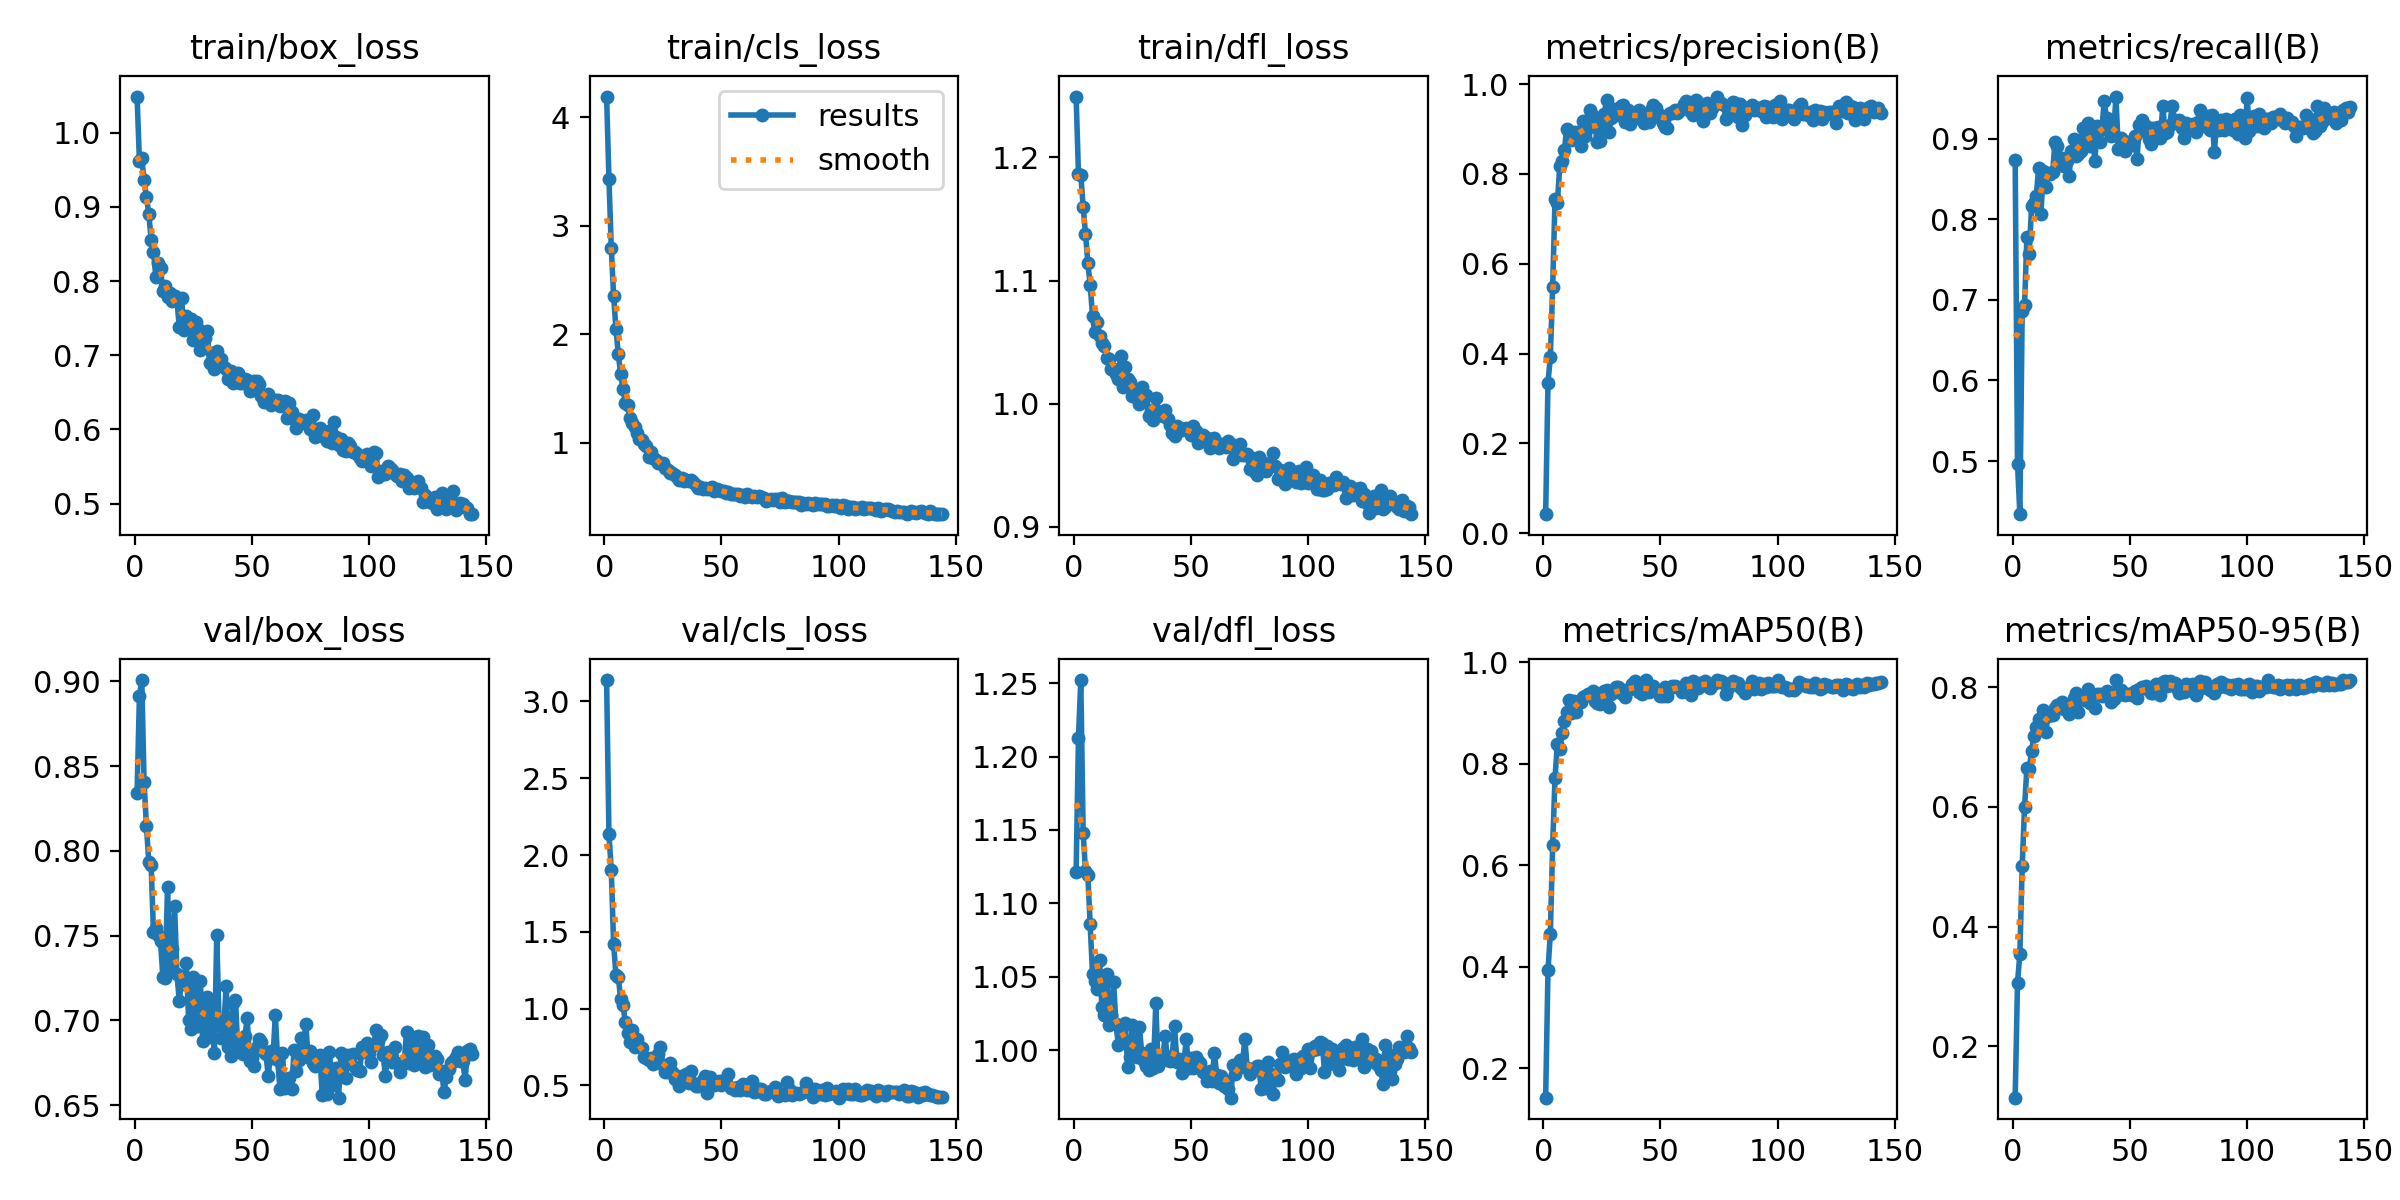

In [8]:
from IPython.display import Image
display(Image(filename='/content/runs/detect/train/results.png', width=600))

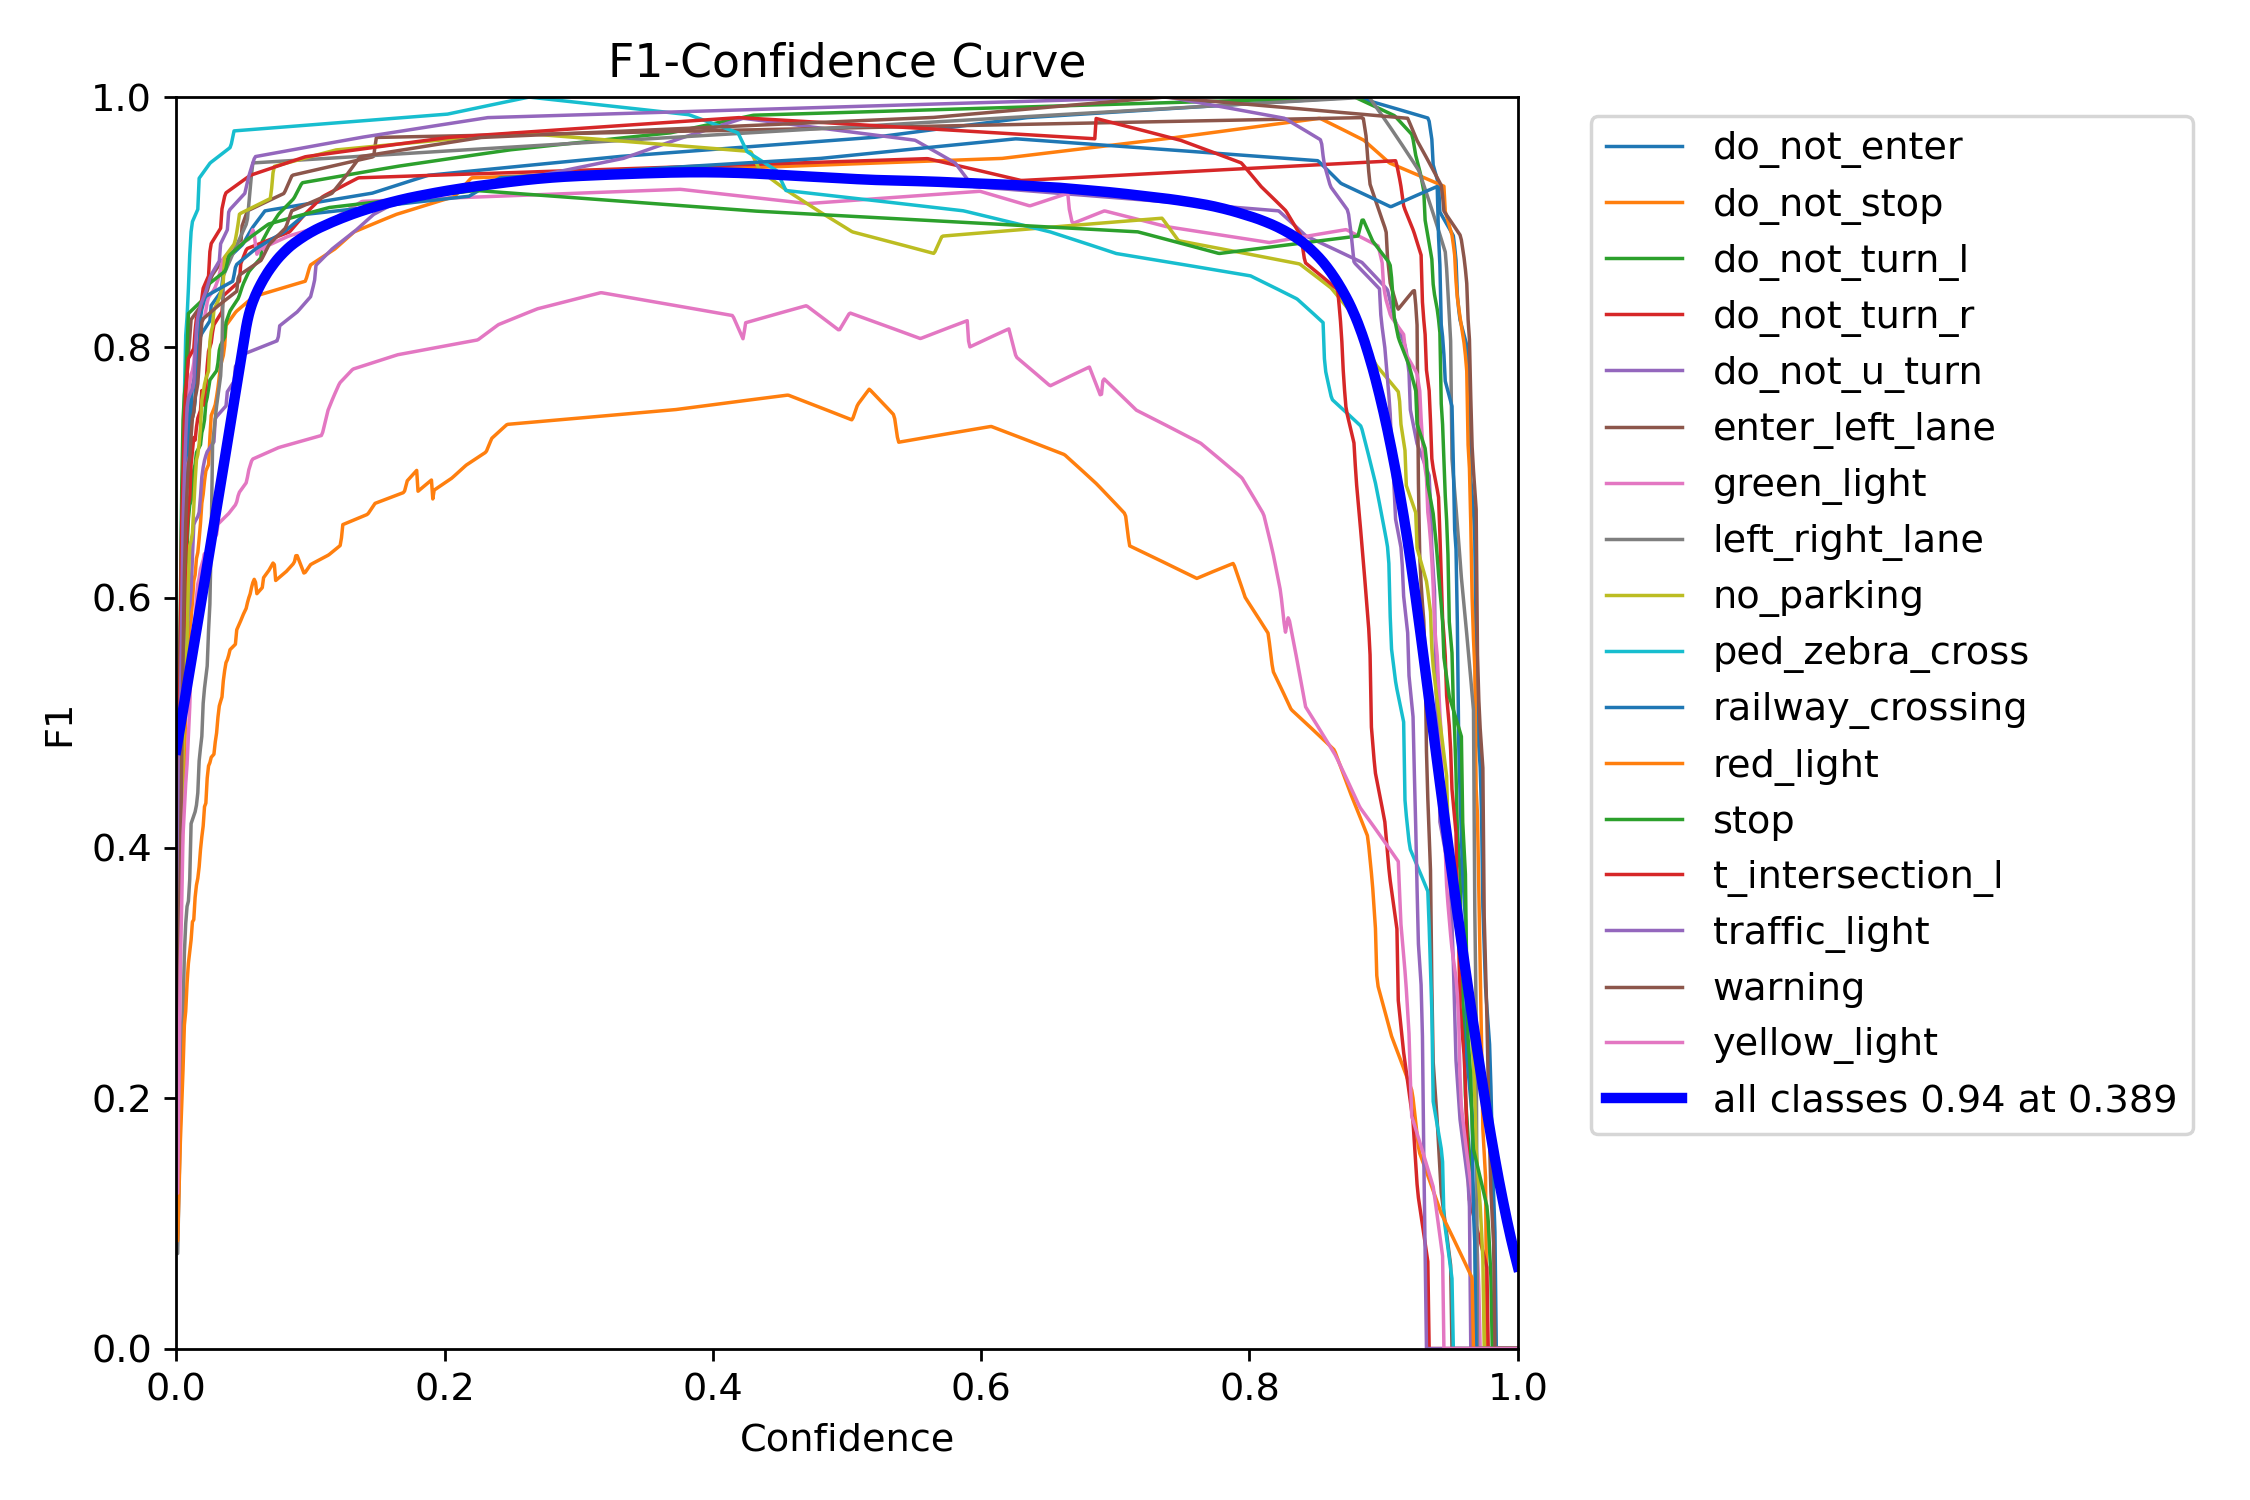

In [10]:
display(Image(filename='/content/runs/detect/train/BoxF1_curve.png', width=600))

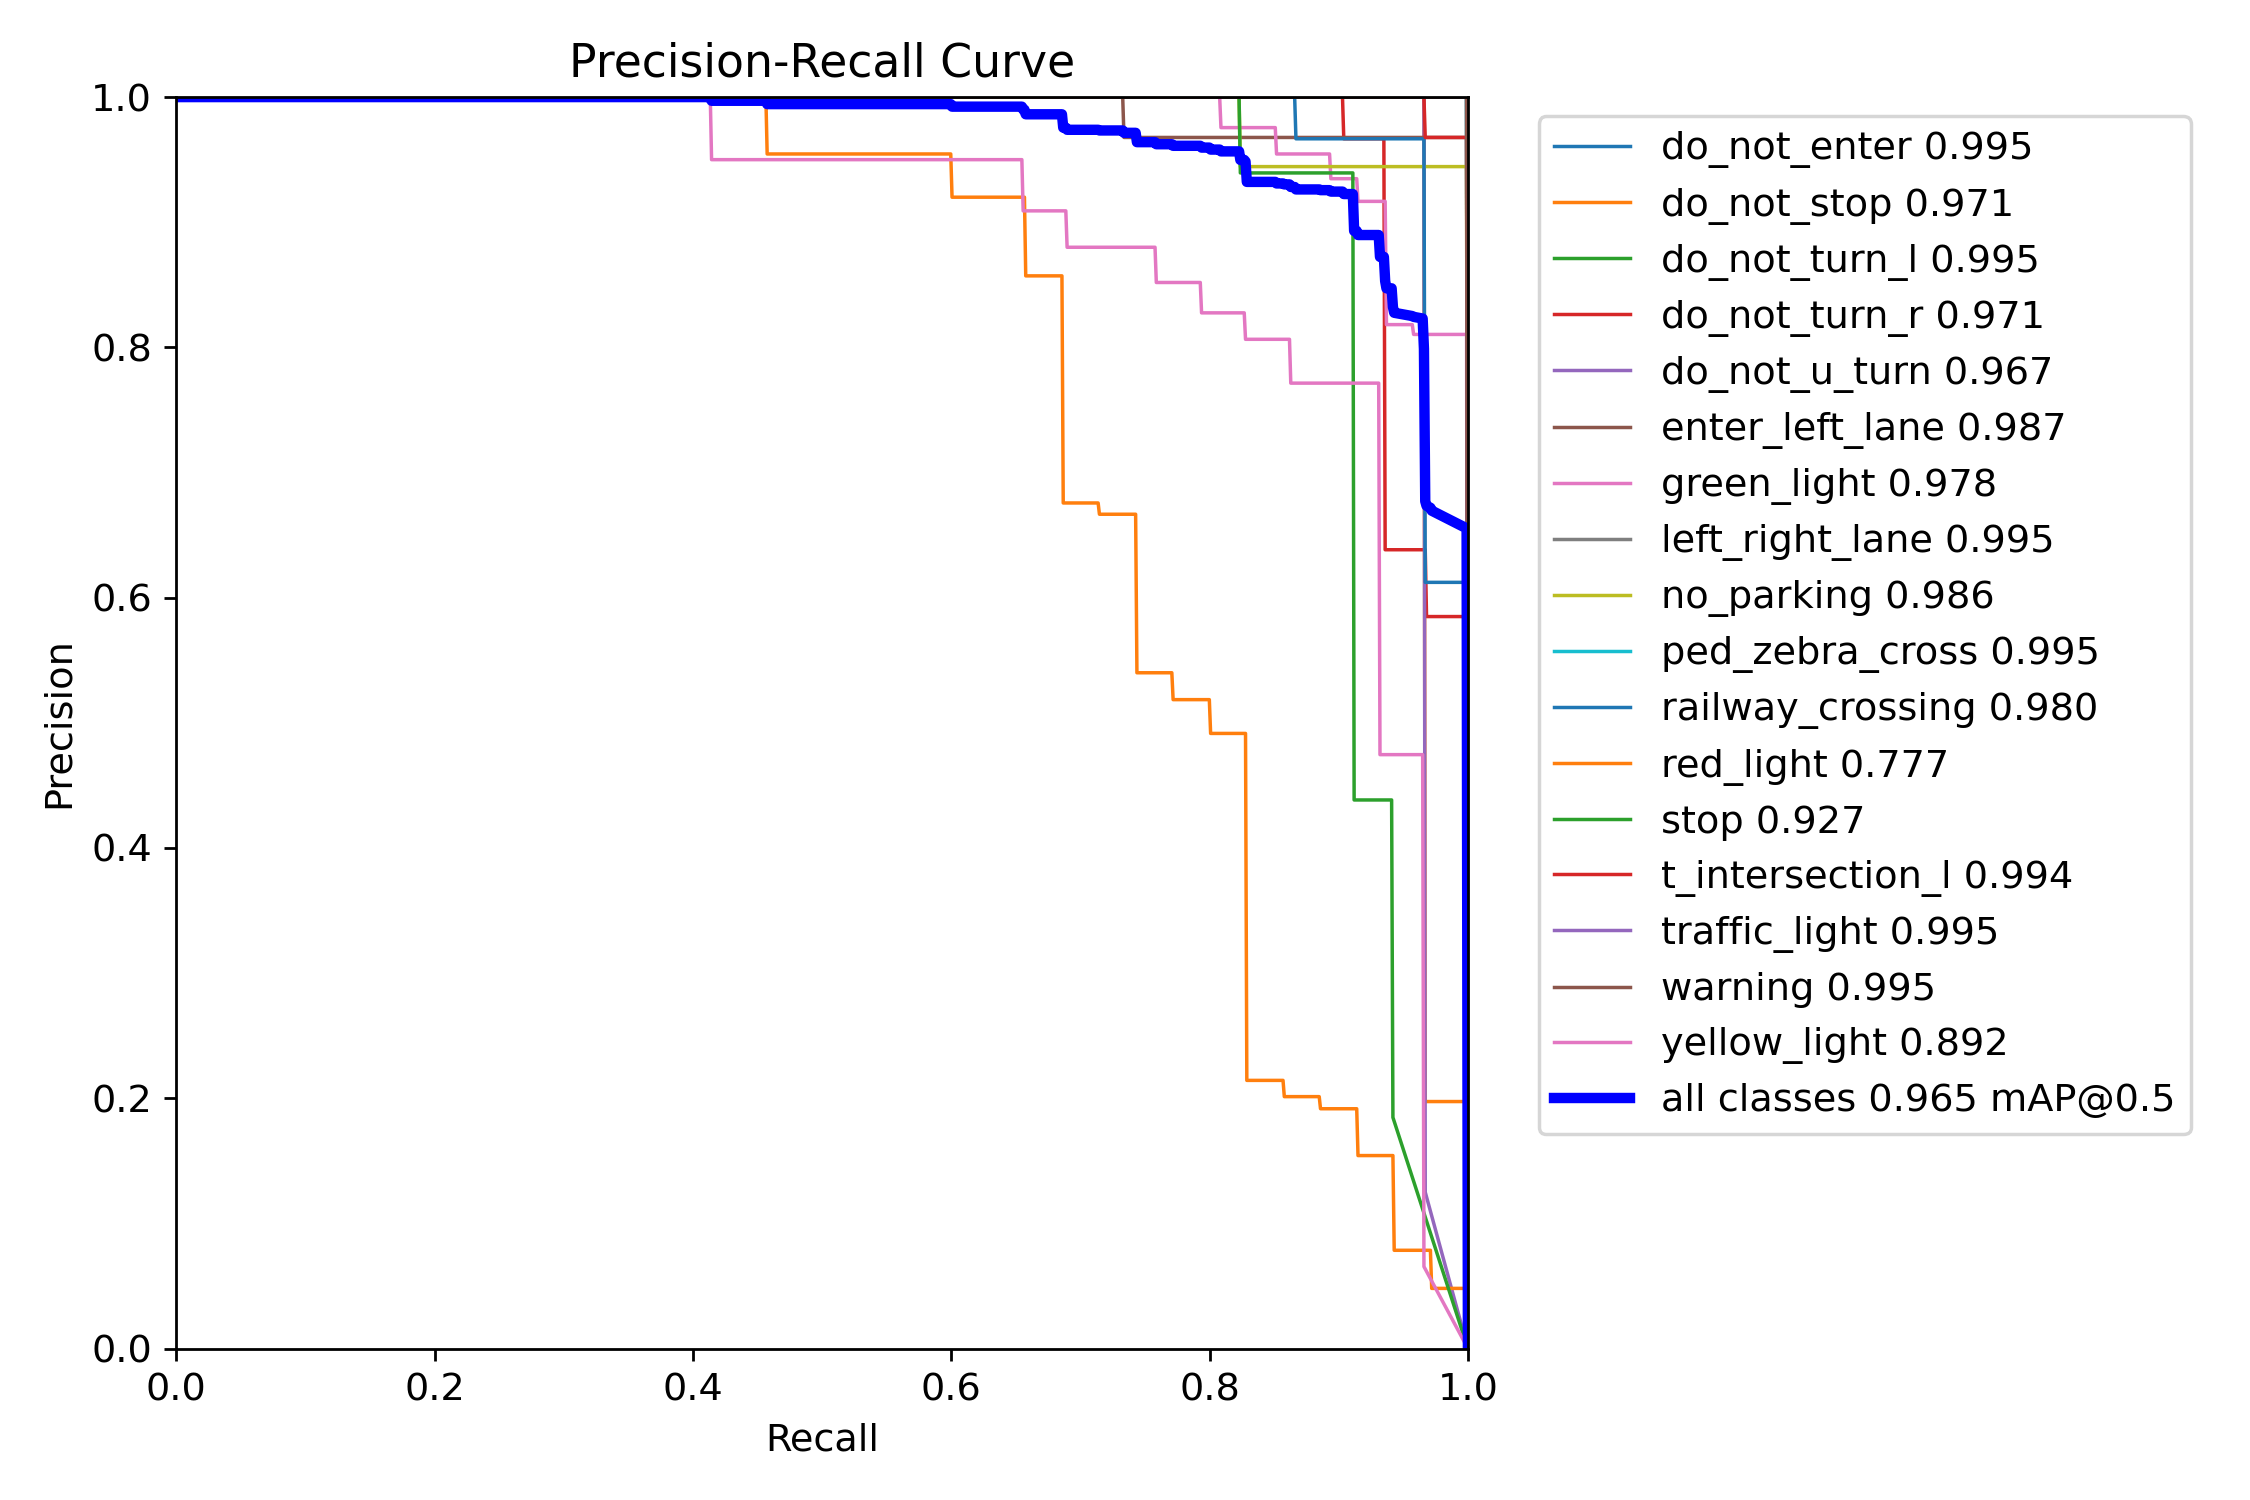

In [11]:
display(Image(filename='/content/runs/detect/train/BoxPR_curve.png', width=600))

# **Validate fine-tuned model**

In [12]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/road-signs-2/test/images save=True

Ultralytics 8.4.8 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 101 layers, 2,586,247 parameters, 0 gradients, 6.3 GFLOPs

image 1/229 /content/road-signs-2/test/images/perintah-pilihan-memasuki-salah-satu-jalur--64-_jpg.rf.ca52a211513d363023f41d44160b6c6a.jpg: 640x640 1 left_right_lane, 10.9ms
image 2/229 /content/road-signs-2/test/images/perintah-pilihan-memasuki-salah-satu-jalur--66-_jpg.rf.d7da089766ebc56b25d725d23400241d.jpg: 640x640 1 left_right_lane, 8.6ms
image 3/229 /content/road-signs-2/test/images/perintah-pilihan-memasuki-salah-satu-jalur--67-_jpg.rf.1f52990ceee7e516138ad06c843397dc.jpg: 640x640 1 left_right_lane, 7.9ms
image 4/229 /content/road-signs-2/test/images/perintah-pilihan-memasuki-salah-satu-jalur--68-_jpg.rf.de641d7695fdd5741b174a0c424c3e68.jpg: 640x640 1 left_right_lane, 7.9ms
image 5/229 /content/road-signs-2/test/images/perintah-pilihan-memasuki-salah-satu-jalur--69-_jpg.rf.92d2e734426473931270b421b2a3911d.jpg: 640x640

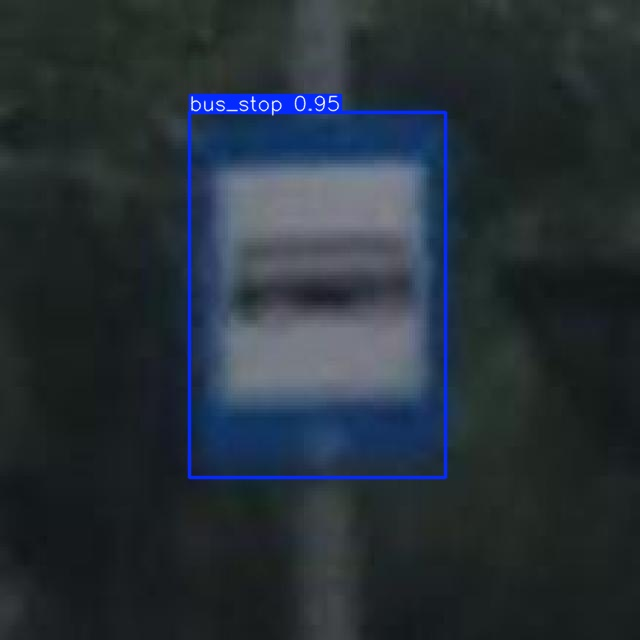

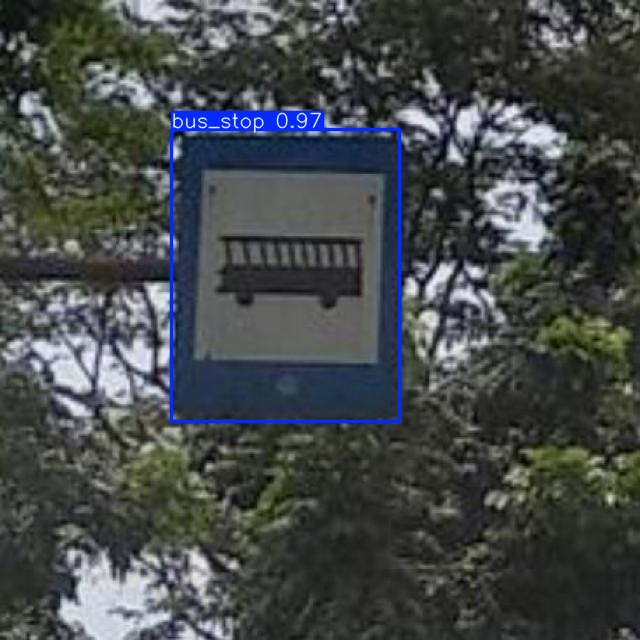

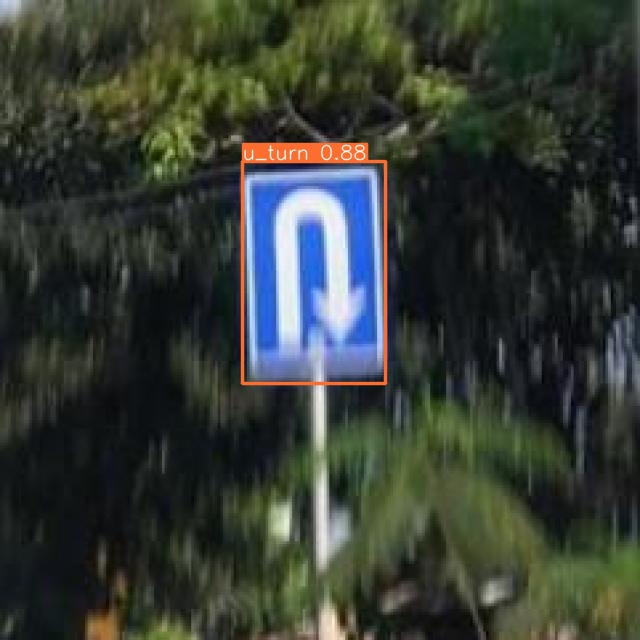

In [13]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")